In [1]:
# Import Packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
from types import *

['sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
train = pd.read_csv('../input/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [3]:
test = pd.read_csv('../input/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
# split numbers using commas and show only 2 decimal points
pd.set_option('display.float_format', '{:,.2f}'.format)
print(train.describe())

In [ ]:
print(train.count())

In [ ]:
train.describe(include='all')

In [ ]:
train.isna().sum()

In [ ]:
test.isna().sum()

In [4]:
train.sort_values(by='revenue', ascending=False).head(20)[['title','revenue','release_date']]

,title,revenue,release_date
1126,The Avengers,1519557910,4/25/12
1761,Furious 7,1506249360,4/1/15
2770,Avengers: Age of Ultron,1405403694,4/22/15
684,Beauty and the Beast,1262886337,3/16/17
2322,Transformers: Dark of the Moon,1123746996,6/28/11
906,The Dark Knight Rises,1084939099,7/16/12
2135,Pirates of the Caribbean: On Stranger Tides,1045713802,5/14/11
2562,Finding Dory,1028570889,6/16/16
881,Alice in Wonderland,1025491110,3/3/10
734,Zootopia,1023784195,2/11/16


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


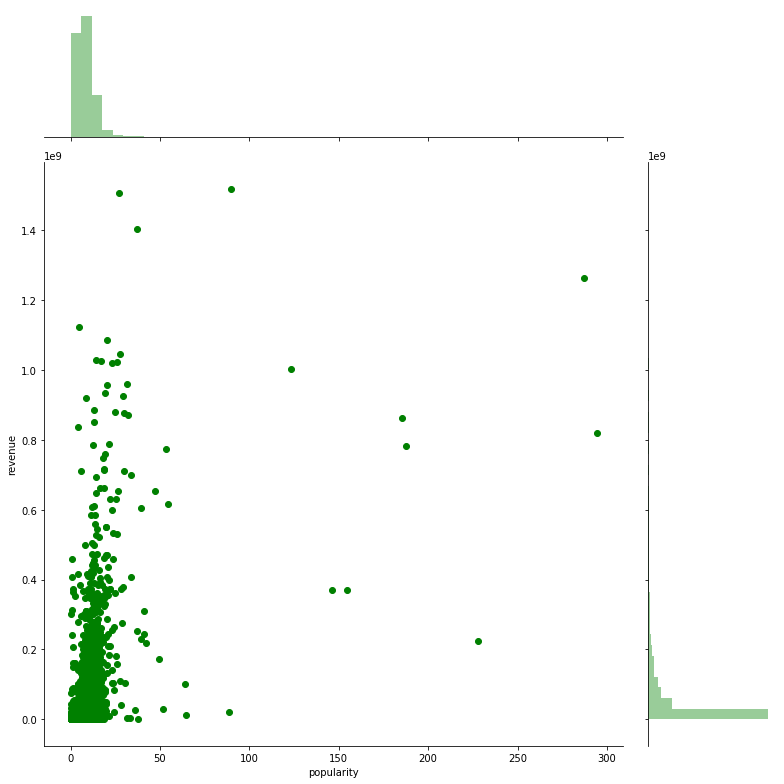

In [5]:
sns.jointplot(x="popularity", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()


In [ ]:
train['status'].value_counts()

In [ ]:
test['status'].value_counts()

In [6]:
test.loc[test['release_date'].isnull() == True, 'release_date'] = '01/01/98'

In [7]:
def date_features(df):
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_year'] = df['release_date'].dt.year
    df['release_month'] = df['release_date'].dt.month
    df['release_day'] = df['release_date'].dt.day
    df['release_quarter'] = df['release_date'].dt.quarter
    df['release_dayofweek'] = df['release_date'].dt.dayofweek
    ''' year = df['release_year']
    now = datetime.datetime.now()
    if year> now.year:
        year=year-100
    else:
        year=year '''
    #df['budget_adj'] = float((float(df['budget'])*1000)/1900)
    #dummies = pd.get_dummies(df['release_dayofweek'])
    #print(dummies)
    ''' df['mon','tue','wed','thu','fri','sat','sun'] = 0
    dayOfWeek = df['release_date'].dt.dayofweek
    dayOfWeek = dayOfWeek.astype(int) ''' 
    #print('hi')
    #print(dayOfWeek,"hi"+str(dayOfWeek))
    #print('hi')
    #print(type(dayOfWeek))
    '''
    print(dayOfWeek)
    if dayOfWeek.astype(int)==0:
        df['mon']=1
    elif dayOfWeek.astype(int)==1:
        df['tue']=1   
    elif dayOfWeek.astype(int)==1:
        df['wed']=1
    elif dayOfWeek.astype(int)==1:
        df['thu']=1
    elif dayOfWeek.astype(int)==1:
        df['fri']=1
    elif dayOfWeek.astype(int)==1:
        df['sat']=1
    elif dayOfWeek.astype(int)==1:
        df['sun']=1 
         '''
    #df.drop(columns=['release_date'], inplace=True)
    return df

train=date_features(train)
#test=date_features(test)
train.sort_values(by='release_year',ascending=False).head(10)[['title','revenue','release_year']]

,title,revenue,release_year
1187,The Bride Wore Black,44566,2068
647,Barbarella,2500000,2068
2649,Shalako,2620000,2068
140,Star!,14000000,2068
1034,Romeo and Juliet,38901218,2068
2147,Rosemary's Baby,33395426,2068
634,The Odd Couple,44527234,2068
2333,You Only Live Twice,111584787,2067
952,Luv,1000000,2067
41,Cool Hand Luke,16217773,2067


In [9]:
#Train
now = datetime.datetime.now()
train.loc[train['release_year'] > now.year, 'release_year'] = train.loc[train['release_year'] >  now.year, 'release_year'].apply(lambda x: x - 100)
train.sort_values(by='release_year',ascending=False).head(10)[['title','revenue','release_year']]
#dummies = pd.get_dummies(train['release_dayofweek'])
#train=pd.concat([train,dummies],axis=1)
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, x in enumerate(names):
    train[x] = (train['release_dayofweek'] == i).astype(int)

In [ ]:
''' train = train.drop(['0'], axis=1)
train = train.drop(['1'], axis=1)
train = train.drop(['2'], axis=1)
train = train.drop(['3'], axis=1)
train = train.drop(['4'], axis=1)
train = train.drop(['5'], axis=1)
train = train.drop(['6'], axis=1)
train = train.drop(['7'], axis=1) '''
train.info()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


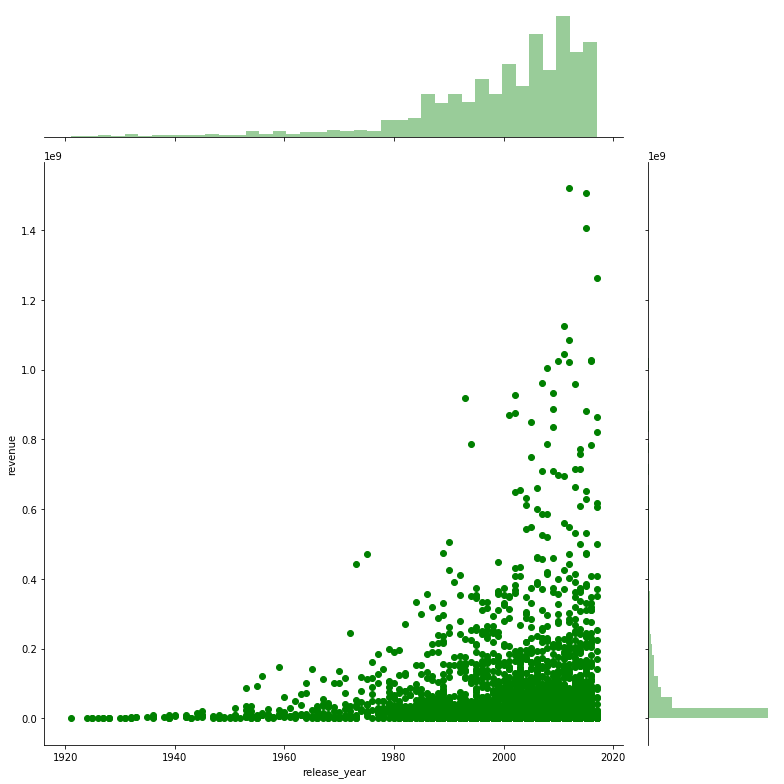

In [10]:
sns.jointplot(x="release_year", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="release_month", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="release_dayofweek", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Monday", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Tuesday", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Wednesday", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Thursday", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Friday", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Saturday", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Sunday", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [11]:
names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, x in enumerate(names):
    train[x] = (train['release_month'] == i+1).astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 47 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null datetime64[ns]
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords     

In [ ]:
sns.jointplot(x="Jan", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Feb", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Mar", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Apr", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="May", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Jun", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Jul", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Aug", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Sep", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Oct", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Nov", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [ ]:
sns.jointplot(x="Dec", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [23]:
train['budget_inflation_varient_val']=train['budget']/train['release_year']
#for i in train:
  #  print(i['budget'])
    #train['budget_inflation_varient_val'] = x/

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


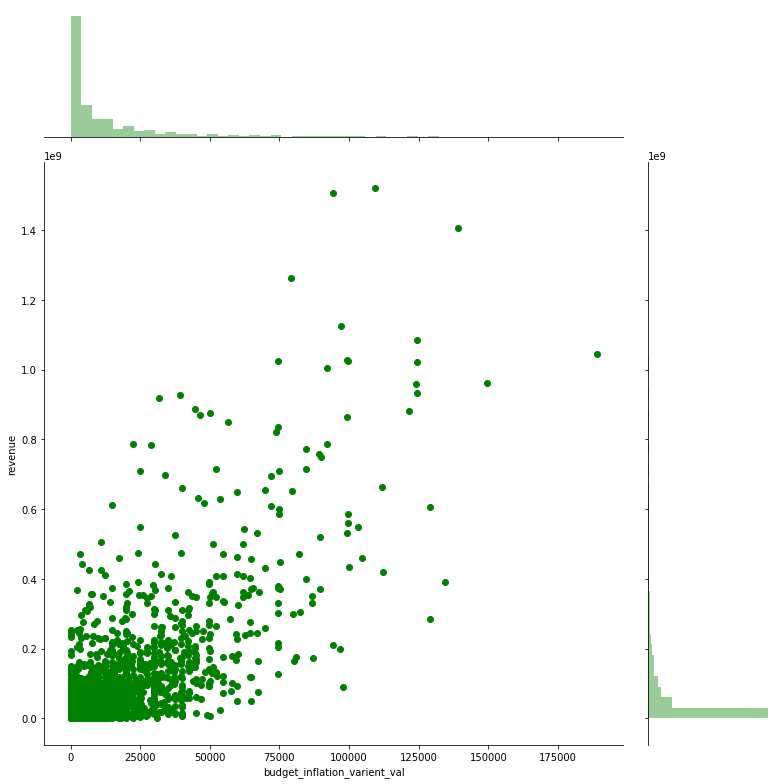

In [24]:
sns.jointplot(x="budget_inflation_varient_val", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()